#Importing the required Python Dependencies


In [1]:
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, model_selection, tree, preprocessing, metrics
import sklearn.ensemble as ske
import seaborn as sns
import matplotlib.pyplot as plt

#Reading the spreadsheetfile into a Pandas DataFrame

In [5]:
titanic_train = pd.read_csv('C:/Users/asridhar/Downloads/train.csv')

#How our Training Data looks like?

In [7]:
print(titanic_train.head())
titanic_train.shape

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


(891, 12)


#Explanation of features and Target Variable
# The Survived column is the target variable to predict. If Suvival = 1 the passenger survived, otherwise Suvival = 0 the passenger dead.

# The other features that describe the passengers include the following:# 
# PassengerId: ID given to each traveler on the boat
# Pclass: the passenger class. It has three possible values: 1,2,3 (first, second and third class)
# The Name of the passeger
# The Sex
# The Age
# SibSp: number of siblings and spouses traveling with the passenger
# Parch: number of parents and children traveling with the passenger
# The ticket number
# The ticket Fare
# The cabin number
# Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#Describe() method defines a high-level statistical description of numerical features

In [8]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#From the output of Statistical inference, we can see that Count variable of "Age" attribute has 177 missing values. Using Median to fill in the null values

In [9]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].median())

#Checking one more time to confirm no missing values

In [10]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Identifying variables that influence the target prediction

#Does Gender have effect on Survival rate?

Number of dead Male passengers :  468
Number of dead Female passengers :  81
Number of alive Male passengers :  109
Number of alive Female passengers :  233


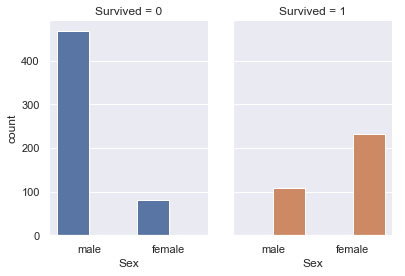

In [11]:
plt.figure(figsize=(25, 7))
sns.set(style="darkgrid")

sns.catplot(x="Sex", hue="Survived", col="Survived",
                 data=titanic_train, kind="count",
                 height=4, aspect=.7)

print("Number of dead Male passengers : ", titanic_train['PassengerId'][(titanic_train.Sex =='male') & (titanic_train.Survived == 0)].count())
print("Number of dead Female passengers : ", titanic_train['PassengerId'][(titanic_train.Sex =='female') & (titanic_train.Survived == 0)].count())
print("Number of alive Male passengers : ", titanic_train['PassengerId'][(titanic_train.Sex =='male') & (titanic_train.Survived == 1)].count())
print("Number of alive Female passengers : ", titanic_train['PassengerId'][(titanic_train.Sex =='female') & (titanic_train.Survived == 1)].count())

#From the above analysis, we can clearly see that Sex is a discriminative feature. "Women have high survival rates than Men"

#Finding a correlation between Sex and Age variable, we can see that

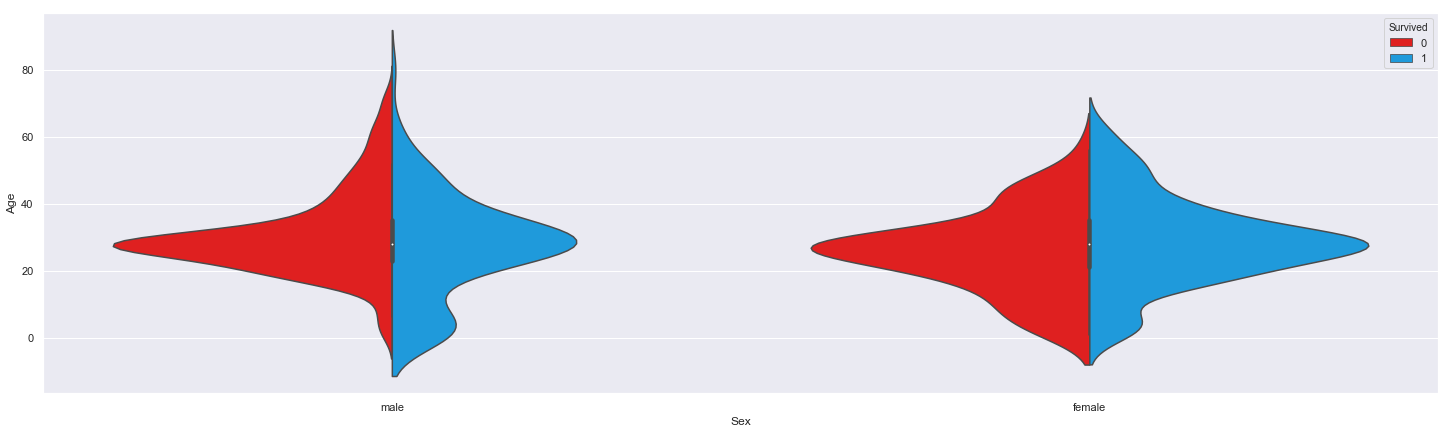

In [12]:
plt.figure(figsize=(25, 7))
sns.set(style="darkgrid")
colorpal = ("#FF0000", "#00A4FA")
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=titanic_train, 
               split=True,
               palette= colorpal
              )


#From the visualization, we can depict that Women survice much higher than Men. More younger men tend to survive
#In common population terms, high death rate is observed between people's age between 20 to 40.
#Age doesn't have significant impact on Woman's survival rate

#Moving the Focus now to find correlation between Fare ticket of each passenger and looking at the picture how it impacts the survival rate?

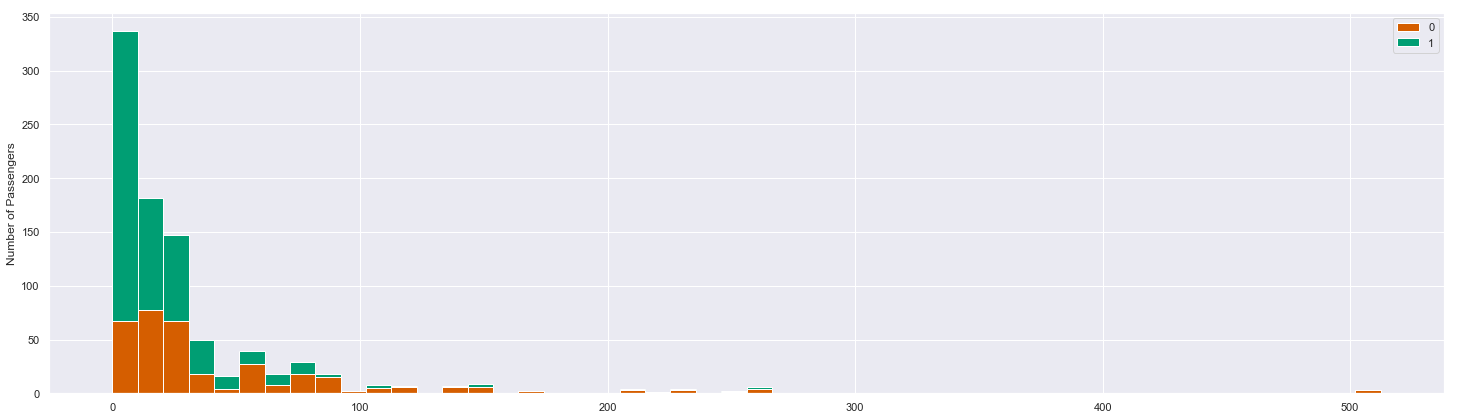

In [13]:
plt.figure(figsize=(25, 7))
sns.set(style="darkgrid")

s1 = list(titanic_train[titanic_train['Survived'] == 1]['Fare'])
s2 = list(titanic_train[titanic_train['Survived'] == 0]['Fare'])
colors= ['#D55E00', '#009E73']
plt.hist([s1,s2], bins =  50, stacked = True, color = colors)
plt.ylabel("Number of Passengers")
plt.legend(titanic_train['Survived'])

#We can infer from the graph that, Passengers with cheaper ticket are more likely to die. Hence the survival rate is higher for passengers who purchased expensive tickets

#Now, Comparing all the above indepent variable based on survival rate

Text(0,0.5,'Passenger Fare')

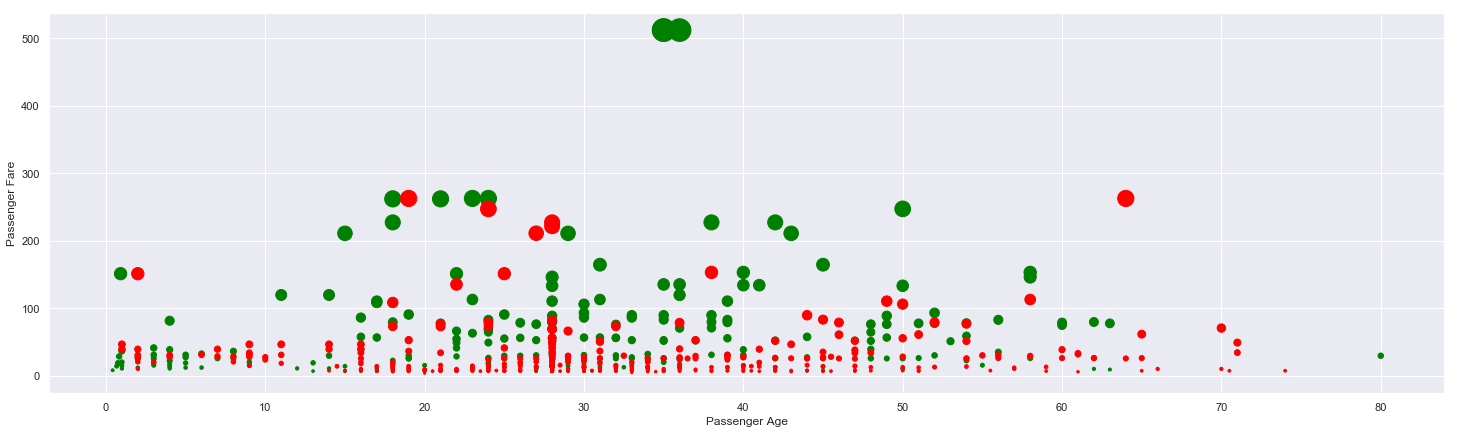

In [14]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()

ax.scatter(titanic_train[titanic_train['Survived'] == 1]['Age'], titanic_train[titanic_train['Survived'] == 1]['Fare'], 
           c='green', s=titanic_train[titanic_train['Survived'] == 1]['Fare'])
ax.scatter(titanic_train[titanic_train['Survived'] == 0]['Age'], titanic_train[titanic_train['Survived'] == 0]['Fare'], 
           c='red', s=titanic_train[titanic_train['Survived'] == 0]['Fare'])
plt.xlabel("Passenger Age")
plt.ylabel("Passenger Fare")

#Irrespective of age, we can obsever that a lot of smaller red circles spread across on lower fare rate between 0 to 50 leads to higher death. It is very significant that larger green dots between 20 to 50 with ticket Fare greater than 200$ observe a high survival rate

#Let's see how ticket fare correlates with class(first, second, third)cabin

Text(0,0.5,'Average Fare')

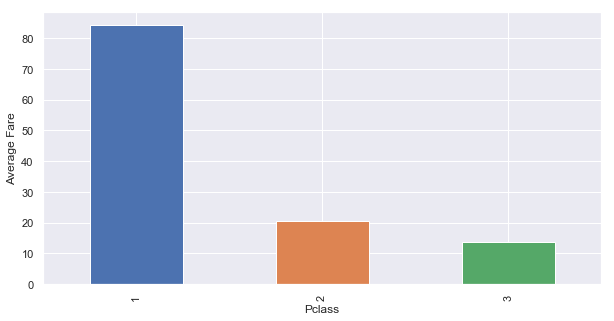

In [15]:
plt.figure(figsize=(10, 5))
ax = plt.subplot()
titanic_train.groupby('Pclass').mean()['Fare'].plot(kind='bar', ax = ax)
plt.ylabel("Average Fare")

#As a matter of fact, There are many passengers travelling in class 1 compared to few passengers travelling in class 3

#Let's check how embarkation and fare affects the survival probability

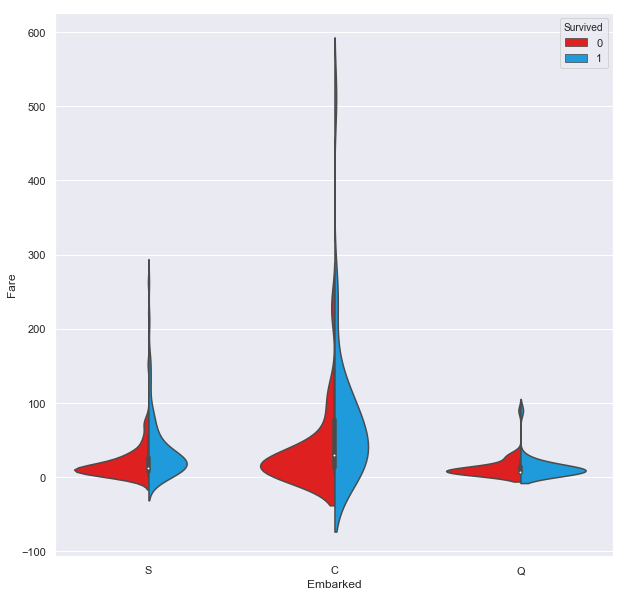

In [16]:
fig = plt.figure(figsize=(10, 10))
sns.violinplot(x='Embarked', y='Fare', hue='Survived', data=titanic_train, split=True, palette= colorpal); 

#It is evident that embarkation C has wider range of Fare tickets and therefore the passengers who pay the highest fare are those who has the highest probability of survival
#A similar trend is observerd with Embarkation S and Q

# 2. Loading Data

In [18]:
def get_traintest_data():
    # reading train data
    titanictrain = pd.read_csv('C:/Users/asridhar/Downloads/train.csv')
    
    # reading test data
    titanictest = pd.read_csv('C:/Users/asridhar/Downloads/test.csv')

    # extracting and then removing the targets from the training data 
    train_pred = titanictrain.Survived
    titanictrain.drop(['Survived'], 1, inplace=True)
    

    # merging train data and test data for future feature engineering
    # we'll also remove the PassengerID since this is not an informative feature
    traintest = titanictrain.append(titanictest)
    traintest.reset_index(inplace=True)
    traintest.drop(['index', 'PassengerId'], inplace=True, axis=1)
    
    return traintest

traintest = get_traintest_data()

In [19]:
#Let's take a look into first few rows of the TrainTest Data

traintest.head()

# =============================================================================
# #3. Cleaning data
# Looking at the passenger names , we can notice that title is attached to the name. Upon extracting the tittle and parsing it more meaningful names, we get:

# =============================================================================
titles = set()
for name in titanic_train['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
print (titles)

{'Don', 'Dr', 'Mr', 'Major', 'Rev', 'Sir', 'Col', 'Mlle', 'Mme', 'Lady', 'Mrs', 'Miss', 'the Countess', 'Jonkheer', 'Capt', 'Ms', 'Master'}


In [20]:
#Creating a dictionary to capture more meaningful conversion


Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # Extracting title from name
    traintest['Title'] = traintest['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # mapping each title
    traintest['Title'] = traintest.Title.map(Title_Dictionary)
    return traintest
traintest = get_titles()
traintest.head()

#Checking consistency across all the title variables
traintest[traintest['Title'].isnull()]

#Checking and filling Missing Age values
#We have seen that Age variable was missing 177 values in training data set. To avoid data leakage from the test data set, we fill the missing ages in the Titanic Train using training set and Titanic Test using the testing test.
#Let's calculate the missing values in Train set 
print (traintest.iloc[:891].Age.isnull().sum())

#Let's calculate the missing values in Test set
print (traintest.iloc[891:].Age.isnull().sum())

#Grouping Sex,PClass, Title to fill in missing values of Age
modify_train = traintest.iloc[:891].groupby(['Sex','Pclass','Title'])
modify_median_train = modify_train.median()
modify_median_train = modify_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
modify_median_train.head()

177
86


,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [21]:
# =============================================================================
# For example:
# 
# If the passenger is female, from Pclass 1, and from royalty the median age is 40.5.
# If the passenger is male, from Pclass 3, with a Mr title, the median age is 26.
# Let's create a function that fills in the missing age in TrainTest based on these different attributes.
#  
# =============================================================================
def fill_age(row):
    condition = (
        (modify_median_train['Sex'] == row['Sex']) & 
        (modify_median_train['Title'] == row['Title']) & 
        (modify_median_train['Pclass'] == row['Pclass'])
    ) 
    return modify_median_train[condition]['Age'].values[0]

#Processing Age Column

def process_age():
    global traintest
    # a function that fills the missing values of the Age variable
    traintest['Age'] = traintest.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)
    return traintest
traintest = process_age()

# =============================================================================
# #Processing Name Column
# #Let us drop the name column and expand title for each record, thereby normalizing the title column with dummy encoding
# =============================================================================
def process_names():
    global traintest
    # we clean the Name variable
    traintest.drop('Name', axis=1, inplace=True)
    
    # encoding in dummy variable
    titles_dummies = pd.get_dummies(traintest['Title'], prefix='Title')
    traintest = pd.concat([traintest, titles_dummies], axis=1)
    
    # removing the title variable
    traintest.drop('Title', axis=1, inplace=True)
    return traintest
traintest = process_names()
traintest.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


In [22]:
# =============================================================================
# #Processing Fare Column 
# cleaning the Fare column with imputed average value - filling the missing column values by mean
# =============================================================================


In [23]:
def process_fares():
    global traintest
    # there's one missing fare value - replacing it with the mean.
    traintest.Fare.fillna(traintest.iloc[:891].Fare.mean(), inplace=True)
    return traintest

traintest = process_fares()

# =============================================================================
# Processing Embarked Column
# We can identify there are two missing values in the Embarked Column, approximating to the most frequent occuring in the training set(S)
# =============================================================================


def process_embarked():
    global traintest
    traintest.Embarked.fillna('S', inplace=True)
    # dummy encoding 
    embarked_dummies = pd.get_dummies(traintest['Embarked'], prefix='Embarked')
    traintest = pd.concat([traintest, embarked_dummies], axis=1)
    traintest.drop('Embarked', axis=1, inplace=True)
    return traintest
traintest = process_embarked()

traintest.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


In [24]:
# =============================================================================
# #Processing cabin
# 
# =============================================================================

train_cabin, test_cabin = set(), set()

for cabin in traintest.iloc[:891]['Cabin']:
    try:
        train_cabin.add(cabin[0])
    except:
        train_cabin.add('U')
        
for cabin in traintest.iloc[891:]['Cabin']:
    try:
        test_cabin.add(cabin[0])
    except:
        test_cabin.add('U')

#Filling the missing cabins with "U" fro unknown

def process_cabin():
    global traintest    

    traintest.Cabin.fillna('U', inplace=True)
    
    # mapping each Cabin value with the cabin letter
    traintest['Cabin'] = traintest['Cabin'].map(lambda cabin: cabin[0])
    
    # dummy encoding ...
    cabin_dummies = pd.get_dummies(traintest['Cabin'], prefix='Cabin')    
    traintest = pd.concat([traintest, cabin_dummies], axis=1)

    traintest.drop('Cabin', axis=1, inplace=True)
    return traintest
traintest = process_cabin()
traintest.head()

# =============================================================================
# #Processing Sex
#Mapping the string values for male and female with 1 and 0
# =============================================================================

def process_sex():
    global traintest
    
    traintest['Sex'] = traintest['Sex'].map({'male':1, 'female':0})
    return traintest
traintest = process_sex()

# =============================================================================
# #Processing Sex
#Mapping the string values for Pclass to 1,2,3
# =============================================================================

def process_pclass():
    
    global traintest
    # encoding into 3 categories:
    pclass_dummies = pd.get_dummies(traintest['Pclass'], prefix="Pclass")
    
    # adding dummy variable
    traintest = pd.concat([traintest, pclass_dummies],axis=1)
    
    # removing "Pclass"
    traintest.drop('Pclass',axis=1,inplace=True)

    return traintest
traintest = process_pclass()

# =============================================================================
# #Processing Ticket
# =============================================================================
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda tick : tick.strip(), ticket)
    ticket = list(filter(lambda tick : not tick.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'
tickets = set()
for tick in traintest['Ticket']:
    tickets.add(cleanTicket(tick))

print (len(tickets))

def process_ticket():
    
    global traintest
    
    # a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda tick : tick.strip(), ticket)
        ticket = list(filter(lambda tick : not tick.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    traintest['Ticket'] = traintest['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(traintest['Ticket'], prefix='Ticket')
    traintest = pd.concat([traintest, tickets_dummies], axis=1)
    traintest.drop('Ticket', inplace=True, axis=1)

    return traintest
traintest = process_ticket()

# =============================================================================
# #Processing Family
# =============================================================================
def process_family():
    
    global traintest
    # introducing a new feature : the size of families (including the passenger)
    traintest['FamilySize'] = traintest['Parch'] + traintest['SibSp'] + 1
    
    # introducing other features based on the family size
    traintest['Singleton'] = traintest['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    traintest['SmallFamily'] = traintest['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    traintest['LargeFamily'] = traintest['FamilySize'].map(lambda s: 1 if 5 <= s else 0)

    return traintest

# =============================================================================
# This function introduces 4 new features:
# 
# FamilySize : the total number of relatives including the passenger (him/her)self.
# Sigleton : a boolean variable that describes families of size = 1
# SmallFamily : a boolean variable that describes families of 2 <= size <= 4
# LargeFamily : a boolean variable that describes families of 5 < size
# =============================================================================

traintest = process_family()
traintest.head()

37


,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0


# =============================================================================
# III MODELING
# 
# The following steps are performed for predictive modelling :
# 1. categorize the model into Training and Test Datasets
# 2. Use the Training Dataset to build predective model
# 3. Evaluate the model using Train Set
# 4. Test the model using the test set and generate and output file for the submission
# =============================================================================

#Importing useful Libraries

(891, 14)
(418, 14)
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8125769783320514
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.8215533300919537
****
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8092374353098302
****
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8249176976842577
****


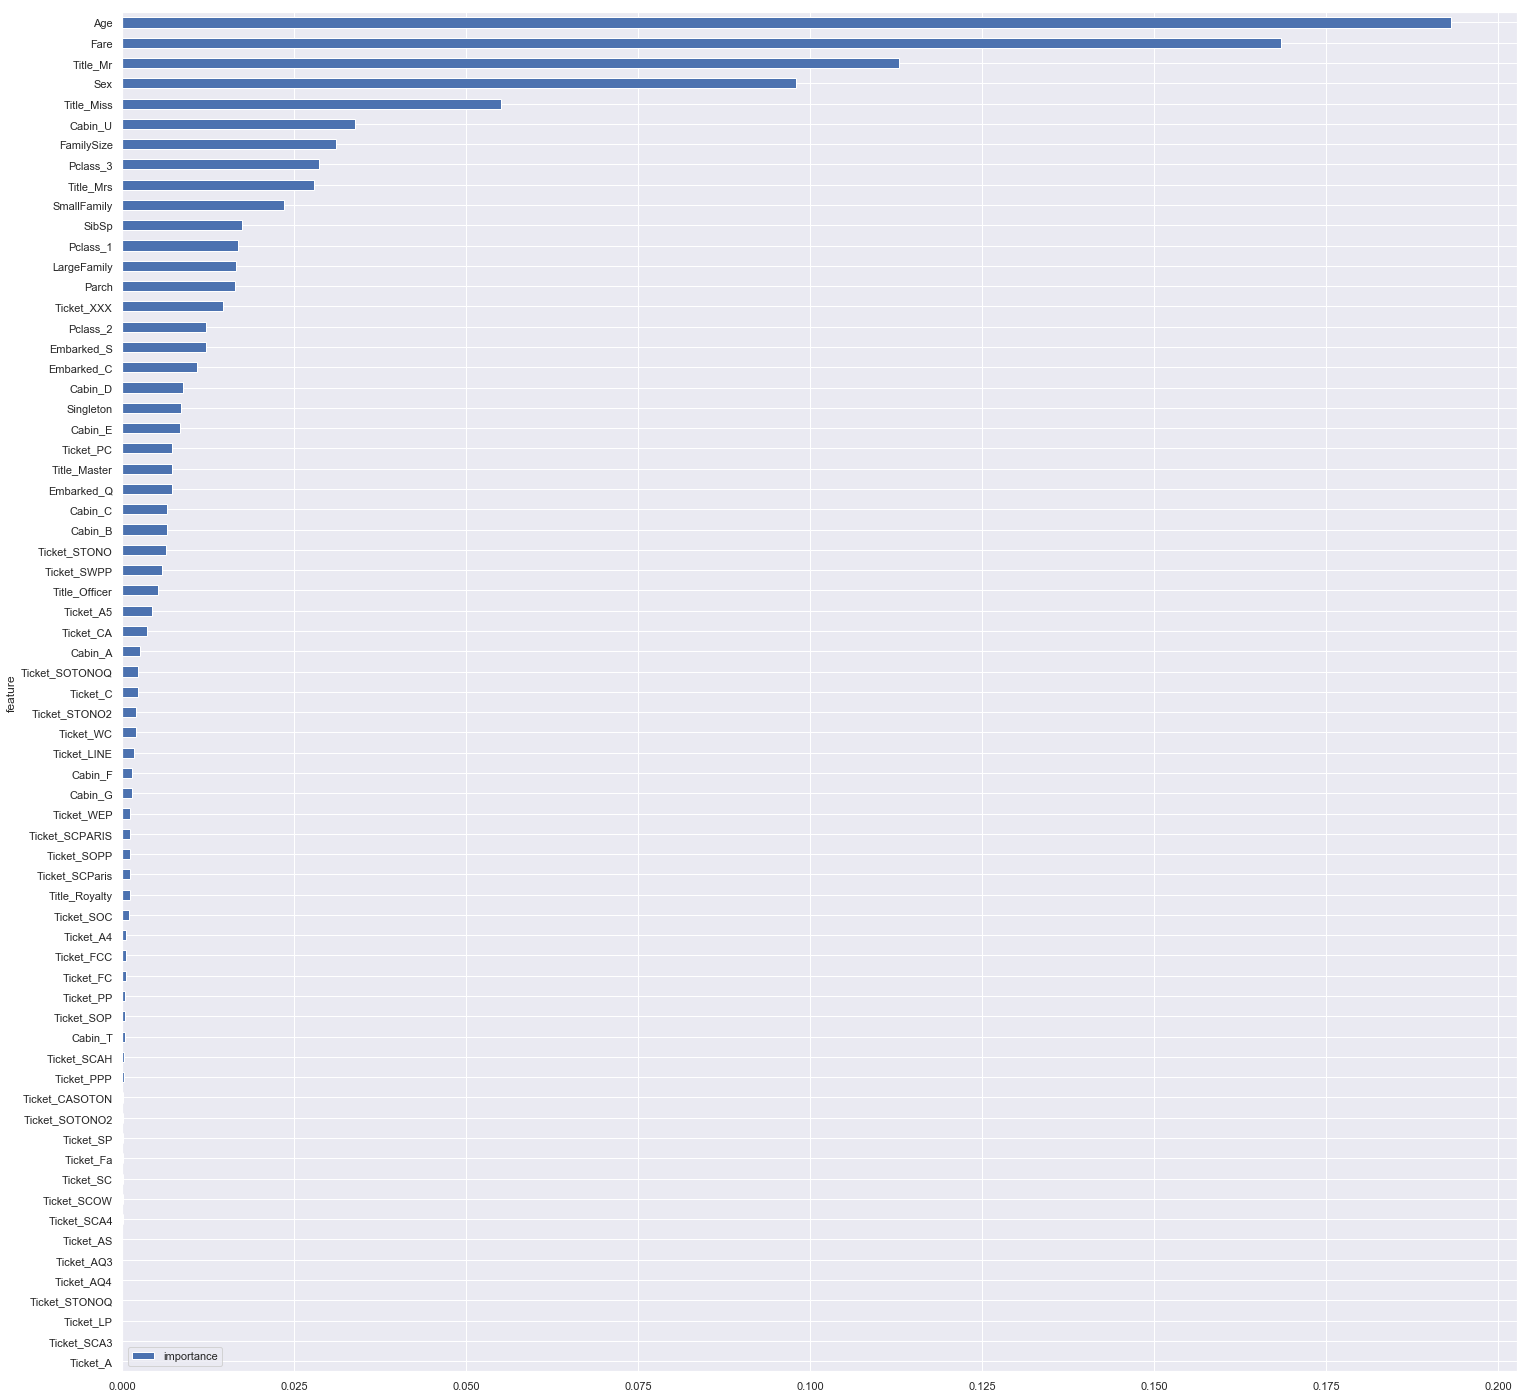

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

#Defining a Small scoring function
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def recover_train_test_target():
    global traintest
    
    target = pd.read_csv('C:/Users/asridhar/Downloads/train.csv', usecols=['Survived'])['Survived'].values
    train = traintest.iloc[:891]
    test = traintest.iloc[891:]
    
    return train, test, target
train, test, target = recover_train_test_target()

# =============================================================================
# #Feature Selection
# When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential.
# Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.
# =============================================================================

clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, target)

#Let's look into the significance of the defined features

features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(25, 25))

# =============================================================================
# From the graph, we can see that "Age","fare","Title_Mr" and "Sex" has higher significance/importance than anyother features in the training set
# 
# Let's transform our train and test set into compact datasets
# 
# =============================================================================
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
print (train_reduced.shape)

test_reduced = model.transform(test)
print (test_reduced.shape)

#Logistic Regression,Random Forest, Gradient Boosting Model Evaluation

logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced, y=target, scoring='accuracy')
    print ('CV score = {0}'.format(score))
    print ('****')
    
#Hyper Parameters Tuning

run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, target)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, target)    
  
#Generating Output of Test Dataset
    
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('C:/Users/asridhar/Downloads/test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('C:/Users/asridhar/Downloads/gridsearch_rf.csv', index=False)